In [228]:
!pip install --upgrade scikit-learn

Importing Dependencies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Importing the data from a csv file into a pandas dataframe and cleaning the dataset a little bit

In [190]:
yt_stats = pd.read_csv('https://raw.githubusercontent.com/MazikGit/Youtube-Shares-Prediction/refs/heads/main/all_youtube_analytics.csv')

In [191]:
yt_stats

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,9/6/2019,8,0,0,1,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
1,YuQaT52VEwo,9/7/2019,7,0,0,0,0,1,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
2,SfTEVOQP-Hk,9/7/2019,6,0,0,0,0,2,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
3,YuQaT52VEwo,9/8/2019,4,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
4,SfTEVOQP-Hk,9/8/2019,2,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,jCBMPRa88_4,11/10/2024,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234885,bN7jBc95XDo,11/10/2024,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234886,ZwtHeB7L6lA,11/10/2024,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234887,5DM_c9zMn0U,11/10/2024,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0


In [192]:
yt_stats.drop('video_id', axis=1, inplace=True)
yt_stats

,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,9/6/2019,8,0,0,1,0,0,0,0,161,...,0,0,0.0,0.0,0,0,0,0,0,0
1,9/7/2019,7,0,0,0,0,1,0,0,59,...,0,0,0.0,0.0,0,0,0,0,0,0
2,9/7/2019,6,0,0,0,0,2,0,0,235,...,0,0,0.0,0.0,0,0,0,0,0,0
3,9/8/2019,4,0,0,0,0,0,0,0,233,...,0,0,0.0,0.0,0,0,0,0,0,0
4,9/8/2019,2,0,0,0,0,0,0,0,120,...,0,0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,11/10/2024,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234885,11/10/2024,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234886,11/10/2024,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234887,11/10/2024,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0


In [193]:
# Converting the 'day' column to datetime format
yt_stats['day'] = pd.to_datetime(yt_stats['day'])
# Converting 'day' to the day of the week (0=Monday, 1=Tuesday, 2=Wednesday, 3=Thursday, 4=Friday, 5=Saturday, 6=Sunday)
yt_stats['day_of_week'] = yt_stats['day'].dt.dayofweek
# Dropping the original day column as we don't need it anymore
yt_stats.drop('day', axis=1, inplace=True)
# Moving the 'shares', and 'day_of_week' column to the front of the dataset
columns = ['shares', 'day_of_week'] + [col for col in yt_stats.columns if col not in ['shares', 'day_of_week']]
yt_stats = yt_stats[columns]
yt_stats

,shares,day_of_week,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,estimatedMinutesWatched,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,0,4,8,0,0,1,0,0,0,161,...,0,0,0.0,0.0,0,0,0,0,0,0
1,0,5,7,0,0,0,0,1,0,59,...,0,0,0.0,0.0,0,0,0,0,0,0
2,0,5,6,0,0,0,0,2,0,235,...,0,0,0.0,0.0,0,0,0,0,0,0
3,0,6,4,0,0,0,0,0,0,233,...,0,0,0.0,0.0,0,0,0,0,0,0
4,0,6,2,0,0,0,0,0,0,120,...,0,0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,0,6,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234885,0,6,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234886,0,6,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0
234887,0,6,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0,0,0,0,0,0


Further cleaning to get rid of unnecessary columns, remove NaNs (if any), and negative values

In [194]:
# Any NaNs in our dataset?
yt_stats.isnull().sum()

,0
shares,0
day_of_week,0
views,0
redViews,0
comments,0
likes,0
dislikes,0
videosAddedToPlaylists,0
videosRemovedFromPlaylists,0
estimatedMinutesWatched,0


In [195]:
# How many columns in our dataset add up to 0?
yt_stats.sum()[yt_stats.sum() == 0]

,0
annotationClickThroughRate,0.0
annotationCloseRate,0.0
annotationImpressions,0.0
annotationClickableImpressions,0.0
annotationClosableImpressions,0.0
annotationClicks,0.0
annotationCloses,0.0


In [196]:
# Removing the annotation columns from our dataset
yt_stats.drop(columns=['annotationClickThroughRate', 'annotationCloseRate', 'annotationImpressions',
                       'annotationClickableImpressions', 'annotationClosableImpressions',
                       'annotationClicks', 'annotationCloses'], axis=1, inplace=True)
yt_stats

<ipython-input-196-5202be8a07be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_stats.drop(columns=['annotationClickThroughRate', 'annotationCloseRate', 'annotationImpressions',


,shares,day_of_week,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,estimatedMinutesWatched,...,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,0,4,8,0,0,1,0,0,0,161,...,1208,32.97,0.0,0.0,0,0,0,0,0,0
1,0,5,7,0,0,0,0,1,0,59,...,509,13.90,0.0,0.0,0,0,0,0,0,0
2,0,5,6,0,0,0,0,2,0,235,...,2351,64.68,0.0,0.0,0,0,0,0,0,0
3,0,6,4,0,0,0,0,0,0,233,...,3495,95.35,0.0,0.0,0,0,0,0,0,0
4,0,6,2,0,0,0,0,0,0,120,...,3629,99.82,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,0,6,0,0,0,0,0,0,0,0,...,0,0.00,0.0,0.0,0,0,0,0,0,0
234885,0,6,0,0,0,0,0,0,0,0,...,0,0.00,0.0,0.0,0,0,0,0,0,0
234886,0,6,0,0,0,0,0,0,0,0,...,0,0.00,0.0,0.0,0,0,0,0,0,0
234887,0,6,0,0,0,0,0,0,0,0,...,0,0.00,0.0,0.0,0,0,0,0,0,0


In [197]:
# Adding redViews to views, and estimatedRedMinutesWated to estimatedMinutesWatched
yt_stats['views'] += yt_stats['redViews']
yt_stats['estimatedMinutesWatched'] += yt_stats['estimatedRedMinutesWatched']
# Dropping the Red columns since they serve no purpose now
yt_stats.drop(columns=['redViews', 'estimatedRedMinutesWatched'], axis=1, inplace=True)
yt_stats

<ipython-input-197-c28d993f25dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_stats['views'] += yt_stats['redViews']
<ipython-input-197-c28d993f25dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_stats['estimatedMinutesWatched'] += yt_stats['estimatedRedMinutesWatched']
<ipython-input-197-c28d993f25dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,shares,day_of_week,views,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,0,4,8,0,1,0,0,0,161,1208,32.97,0.0,0.0,0,0,0,0,0,0
1,0,5,7,0,0,0,1,0,59,509,13.90,0.0,0.0,0,0,0,0,0,0
2,0,5,6,0,0,0,2,0,235,2351,64.68,0.0,0.0,0,0,0,0,0,0
3,0,6,4,0,0,0,0,0,233,3495,95.35,0.0,0.0,0,0,0,0,0,0
4,0,6,2,0,0,0,0,0,120,3629,99.82,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,0,6,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0,0,0,0,0,0
234885,0,6,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0,0,0,0,0,0
234886,0,6,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0,0,0,0,0,0
234887,0,6,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0,0,0,0,0,0


In [198]:
# Dropping any remaining unneeded columns for our purposes
yt_stats.drop(columns=['cardClickRate', 'cardTeaserClickRate', 'cardImpressions',
                       'cardTeaserImpressions', 'cardClicks', 'cardTeaserClicks',
                       'videosAddedToPlaylists', 'videosRemovedFromPlaylists'], axis=1, inplace=True)
yt_stats

<ipython-input-198-49535deca863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_stats.drop(columns=['cardClickRate', 'cardTeaserClickRate', 'cardImpressions',


,shares,day_of_week,views,comments,likes,dislikes,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,subscribersGained,subscribersLost
0,0,4,8,0,1,0,161,1208,32.97,0,0
1,0,5,7,0,0,0,59,509,13.90,0,0
2,0,5,6,0,0,0,235,2351,64.68,0,0
3,0,6,4,0,0,0,233,3495,95.35,0,0
4,0,6,2,0,0,0,120,3629,99.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
234884,0,6,0,0,0,0,0,0,0.00,0,0
234885,0,6,0,0,0,0,0,0,0.00,0,0
234886,0,6,0,0,0,0,0,0,0.00,0,0
234887,0,6,0,0,0,0,0,0,0.00,0,0


In [199]:
# Do we have any negative values?
yt_stats.describe()

,shares,day_of_week,views,comments,likes,dislikes,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,subscribersGained,subscribersLost
count,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000
mean,0.337198,3.003299,107.559447,0.039419,0.969816,0.032215,4156.298090,1352.808395,26.394117,0.167173,0.004743
std,1.552007,1.999796,406.242056,0.355816,3.984013,0.241694,15160.053997,1244.740948,37.193933,0.826207,0.079772
min,0.000000,0.000000,0.000000,0.000000,-11.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,77.000000,4.060000,0.000000,0.000000
50%,0.000000,3.000000,10.000000,0.000000,0.000000,0.000000,208.000000,1292.000000,25.170000,0.000000,0.000000
75%,0.000000,5.000000,43.000000,0.000000,0.000000,0.000000,1277.000000,2055.000000,37.090000,0.000000,0.000000
max,251.000000,6.000000,11476.000000,24.000000,206.000000,11.000000,363206.000000,26792.000000,8110.730000,31.000000,9.000000


In [200]:
# Yes we do, likes and dislikes have negative values, so we remove them
yt_stats = yt_stats[(yt_stats['likes'] >= 0) & (yt_stats['dislikes'] >= 0)]
yt_stats

,shares,day_of_week,views,comments,likes,dislikes,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,subscribersGained,subscribersLost
0,0,4,8,0,1,0,161,1208,32.97,0,0
1,0,5,7,0,0,0,59,509,13.90,0,0
2,0,5,6,0,0,0,235,2351,64.68,0,0
3,0,6,4,0,0,0,233,3495,95.35,0,0
4,0,6,2,0,0,0,120,3629,99.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
234884,0,6,0,0,0,0,0,0,0.00,0,0
234885,0,6,0,0,0,0,0,0,0.00,0,0
234886,0,6,0,0,0,0,0,0,0.00,0,0
234887,0,6,0,0,0,0,0,0,0.00,0,0


In [201]:
# No more negative values in likes/dislikes columns
yt_stats.describe()

,shares,day_of_week,views,comments,likes,dislikes,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,subscribersGained,subscribersLost
count,231209.000000,231209.000000,231209.000000,231209.000000,231209.000000,231209.000000,231209.000000,231209.000000,231209.000000,231209.000000,231209.000000
mean,0.332301,3.001847,105.805159,0.039428,0.977419,0.035211,4092.311735,1344.207449,26.402409,0.164976,0.004671
std,1.543099,1.999862,402.389683,0.357384,3.963154,0.229995,15034.783396,1243.732850,37.438253,0.820598,0.078560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,68.000000,3.620000,0.000000,0.000000
50%,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,199.000000,1281.000000,25.170000,0.000000,0.000000
75%,0.000000,5.000000,42.000000,0.000000,0.000000,0.000000,1240.000000,2047.000000,37.170000,0.000000,0.000000
max,251.000000,6.000000,11476.000000,24.000000,206.000000,11.000000,363206.000000,26792.000000,8110.730000,31.000000,9.000000


In [202]:
# Split day_of_week into dummy variables
day_of_week_encoding = pd.get_dummies(yt_stats['day_of_week'])
day_of_week_encoding = day_of_week_encoding.rename(columns={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
day_of_week_encoding

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
234884,False,False,False,False,False,False,True
234885,False,False,False,False,False,False,True
234886,False,False,False,False,False,False,True
234887,False,False,False,False,False,False,True


In [203]:
# Dropping the original day_of_week column now that we did the encoding
yt_stats.drop('day_of_week', axis=1, inplace=True)
# Joining the encoded day_of_week columns to the original Dataframe
yt_stats = pd.concat([yt_stats, day_of_week_encoding], axis=1)
yt_stats

<ipython-input-203-68a998403ae0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_stats.drop('day_of_week', axis=1, inplace=True)


,shares,views,comments,likes,dislikes,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,subscribersGained,subscribersLost,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,8,0,1,0,161,1208,32.97,0,0,False,False,False,False,True,False,False
1,0,7,0,0,0,59,509,13.90,0,0,False,False,False,False,False,True,False
2,0,6,0,0,0,235,2351,64.68,0,0,False,False,False,False,False,True,False
3,0,4,0,0,0,233,3495,95.35,0,0,False,False,False,False,False,False,True
4,0,2,0,0,0,120,3629,99.82,0,0,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True
234885,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True
234886,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True
234887,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True


**Correlation Heatmap**

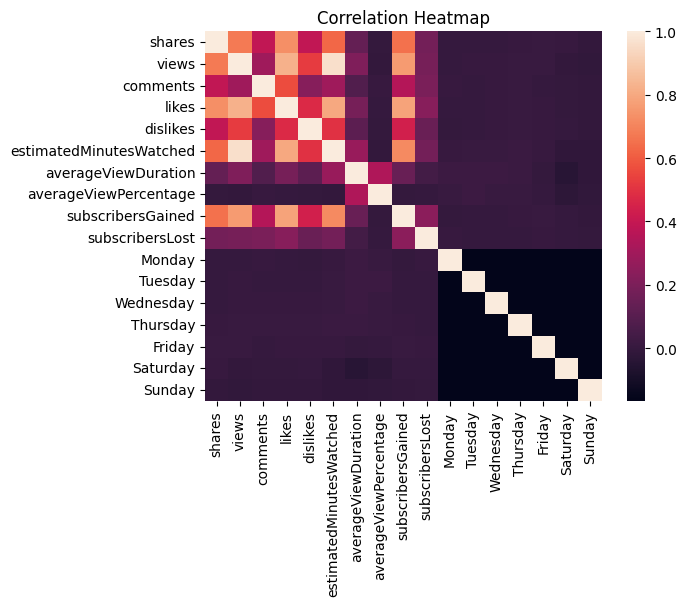

In [205]:
sns.heatmap(yt_stats.corr())
plt.title('Correlation Heatmap')
plt.show()

What features do we have in our dataset?

In [206]:
yt_stats.columns

Index(['shares', 'views', 'comments', 'likes', 'dislikes',
       'estimatedMinutesWatched', 'averageViewDuration',
       'averageViewPercentage', 'subscribersGained', 'subscribersLost',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

How much data do we have?

In [207]:
yt_stats.shape

(231209, 17)

What data types do we have?

In [208]:
yt_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231209 entries, 0 to 234888
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   shares                   231209 non-null  int64  
 1   views                    231209 non-null  int64  
 2   comments                 231209 non-null  int64  
 3   likes                    231209 non-null  int64  
 4   dislikes                 231209 non-null  int64  
 5   estimatedMinutesWatched  231209 non-null  int64  
 6   averageViewDuration      231209 non-null  int64  
 7   averageViewPercentage    231209 non-null  float64
 8   subscribersGained        231209 non-null  int64  
 9   subscribersLost          231209 non-null  int64  
 10  Monday                   231209 non-null  bool   
 11  Tuesday                  231209 non-null  bool   
 12  Wednesday                231209 non-null  bool   
 13  Thursday                 231209 non-null  bool   
 14  Friday   

**Visualizing the Total Shares, Comments, Likes, and Dislikes**

<ipython-input-209-cb1271fcab0c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_labels, x=x_values, alpha = 1, orient='h', palette='viridis')


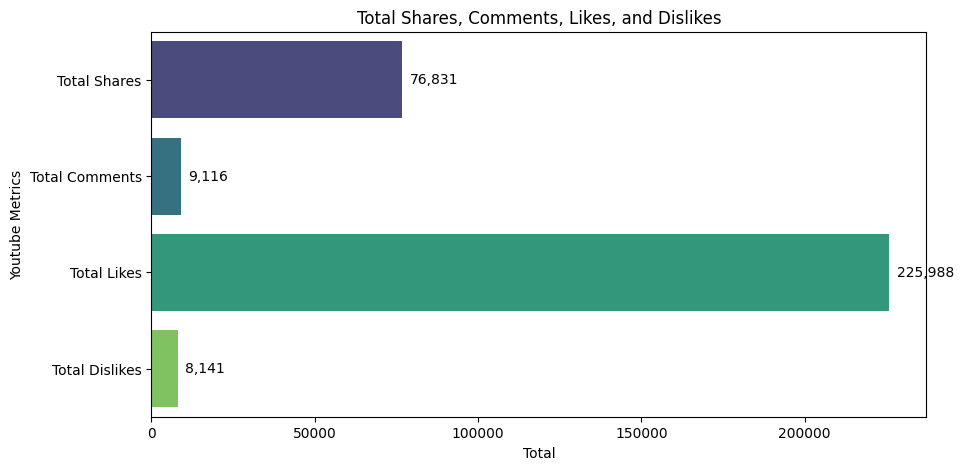

In [209]:
# Gathering sums of relevant columns
shares_total = yt_stats['shares'].sum()
comments_total = yt_stats['comments'].sum()
likes_total = yt_stats['likes'].sum()
dislikes_total = yt_stats['dislikes'].sum()
# Creating the barplot
plt.figure(figsize=(10, 5))
x_values = [shares_total, comments_total, likes_total, dislikes_total]
y_labels = ['Total Shares', 'Total Comments', 'Total Likes', 'Total Dislikes']
sns.barplot(y=y_labels, x=x_values, alpha = 1, orient='h', palette='viridis')
# Adding the exact height of the bars to the bar graph
for i, value in enumerate(x_values):
    plt.text(value + (0.01 * max(x_values)), i, f'{value:,.0f}', va='center', ha='left', fontsize=10)
plt.title('Total Shares, Comments, Likes, and Dislikes')
plt.xlabel('Total')
plt.ylabel('Youtube Metrics')
plt.show()

**What Proportion of Liked Videos are also Shared Videos?**

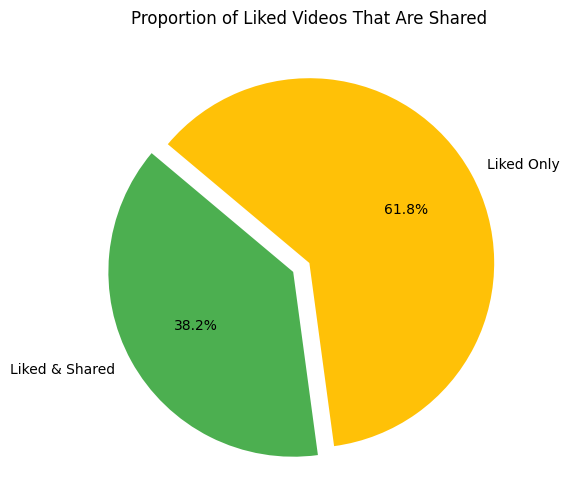

In [210]:
# Filtering to get the number of liked videos and numbered of shared videos
liked_videos = yt_stats[yt_stats['likes'] > 0]
liked_and_shared_videos = liked_videos[liked_videos['shares'] > 0]
# Getting counts for both videos
shared_count = len(liked_and_shared_videos)
not_shared_count = len(liked_videos) - shared_count
# Creating the pie chart
labels = ['Liked & Shared', 'Liked Only']
sizes = [shared_count, not_shared_count]
colors = ['#4caf50', '#ffc107']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Liked Videos That Are Shared')
plt.show()

**What Proportion of Disliked Videos are also Shared Videos?**

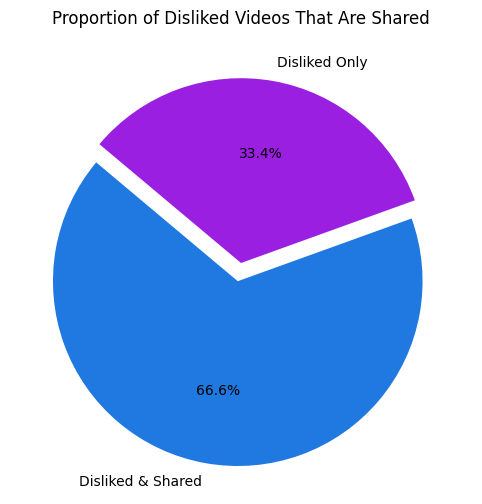

In [211]:
# Filtering to get the number of disliked videos and numbered of shared videos
disliked_videos = yt_stats[yt_stats['dislikes'] > 0]
disliked_and_shared_videos = disliked_videos[disliked_videos['shares'] > 0]
# Getting counts for both videos
shared_count2 = len(disliked_and_shared_videos)
not_shared_count2 = len(disliked_videos) - shared_count2
# Creating the pie chart
labels = ['Disliked & Shared', 'Disliked Only']
sizes = [shared_count2, not_shared_count2]
colors = ['#1f79e0', '#9a1fe0']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Disliked Videos That Are Shared')
plt.show()

**Separating the Data into features (X) and targets (y)**

**Not considering 'shares' for X as that is what we are predicting**

In [212]:
yt_stats

,shares,views,comments,likes,dislikes,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,subscribersGained,subscribersLost,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,8,0,1,0,161,1208,32.97,0,0,False,False,False,False,True,False,False
1,0,7,0,0,0,59,509,13.90,0,0,False,False,False,False,False,True,False
2,0,6,0,0,0,235,2351,64.68,0,0,False,False,False,False,False,True,False
3,0,4,0,0,0,233,3495,95.35,0,0,False,False,False,False,False,False,True
4,0,2,0,0,0,120,3629,99.82,0,0,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234884,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True
234885,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True
234886,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True
234887,0,0,0,0,0,0,0,0.00,0,0,False,False,False,False,False,False,True


In [213]:
X = yt_stats.drop('shares', axis=1)
y = yt_stats['shares']

**Splitting the dataset into training and test sets in a 70/30 ratio**

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

Create the model and fit (train) on the training data

In [215]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

Make Predictions on the test data

In [216]:
y_pred = LR.predict(X_test)

Calculating the Coefficients

In [217]:
coefficients = LR.coef_
print(f'Coefficients: {coefficients}')

Coefficients: [ 2.14206011e-03  1.42515212e-01  1.73121807e-01  4.14660298e-02
 -3.93602358e-05  3.21495947e-05 -4.89955598e-04  2.52893493e-01
 -1.99810367e-02  5.62714807e-04  9.33267380e-04 -1.22287247e-02
 -1.01094175e-02  7.41057309e-03  2.31355236e-02 -9.70393670e-03]


Calculating the Intercept

In [218]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 0.018903739464962377


Calculating R-squared (R2)

In [220]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.4541171653546997


Calculating the Mean Squared Error (MSE)

In [221]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 1.5935844763031768


Calculating the Root Mean Squared Error (RMSE)

In [229]:
import numpy as np
# Unfortunately I had to calculate RMSE manually, as I cannot use the squared=False clause
# in my code, even when trying to update scikit-learn
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 1.262372558440327


Calculating the Mean Absolute Error (MAE)

In [230]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 0.2951170405488125


Exporting the model as pickle

In [231]:
import pickle

with open('youtube_shares_prediction_model.pkl', 'wb') as f:
    pickle.dump(LR, f)